IMPORTING ALL THE LIBRARY FILES

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import seaborn as sns
import itertools
from keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.utils import shuffle

from PIL import Image
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
print ('modules loaded')

modules loaded


PROVIDING A PATH FOR THE DATASET

In [2]:
train_data_dir = 'Training'
test_data_dir = 'Testing'

SPLITTING THE DATA INTO TRAINING TESTING AND VALIDATION

In [3]:
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1295 images belonging to 4 classes.


DATA AUGMENTATION AND PREPROCESSING

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

MODEL GENERATION

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

COMPILING THE MODEL

In [6]:
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # Assuming 4 classes

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

TRAINING THE MODEL

Found 4571 images belonging to 4 classes.
Epoch 1/15
143/143 [==============================] - 396s 3s/step - loss: 0.4620 - accuracy: 0.8521
Epoch 2/15
143/143 [==============================] - 370s 3s/step - loss: 0.1765 - accuracy: 0.9455
Epoch 3/15
143/143 [==============================] - 375s 3s/step - loss: 0.1444 - accuracy: 0.9521
Epoch 4/15
143/143 [==============================] - 375s 3s/step - loss: 0.0975 - accuracy: 0.9683
Epoch 5/15
143/143 [==============================] - 377s 3s/step - loss: 0.1129 - accuracy: 0.9635
Epoch 6/15
143/143 [==============================] - 375s 3s/step - loss: 0.0680 - accuracy: 0.9786
Epoch 7/15
143/143 [==============================] - 368s 3s/step - loss: 0.0560 - accuracy: 0.9836
Epoch 8/15
143/143 [==============================] - 385s 3s/step - loss: 0.0674 - accuracy: 0.9777
Epoch 9/15
143/143 [==============================] - 288s 2s/step - loss: 0.0521 - accuracy: 0.9827
Epoch 10/15
143/143 [============================

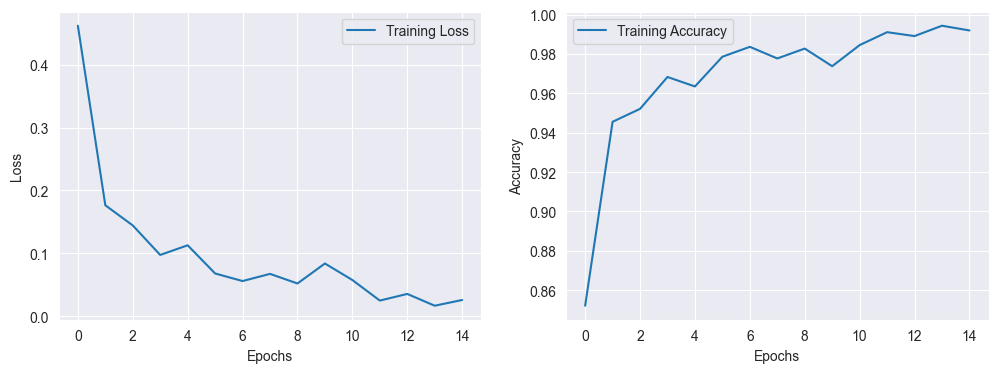

In [54]:
train_data_dir = 'Training'
batch_size = 16
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 15  # You can adjust this as needed
history = model.fit(train_generator, epochs=epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

SAVING THE MODEL AND LOADING THE MODEL

In [7]:
model.save('brain_tumor_model.h5')

loaded_model = tf.keras.models.load_model('brain_tumor_model.h5')

CALCULATING CONFUSION MATRIX

41/41 [==============================] - 19s 420ms/step


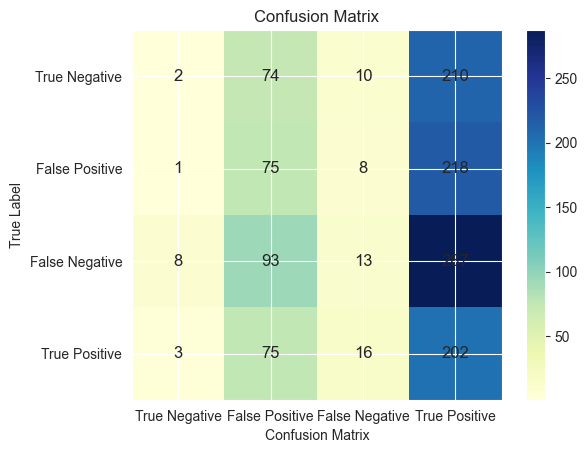

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import seaborn as sns

# Assuming you have already defined 'predictions' and 'y_true'
predictions = model.predict(test_generator)
y_true = test_generator.classes
conf_matrix = metrics.confusion_matrix(y_true, np.argmax(predictions, axis=-1))

# Plot the confusion matrix with labeled quadrants and light colors
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('YlGnBu'))  # Using a light color map
ax.figure.colorbar(im, ax=ax)

# Define labels for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=labels, yticklabels=labels,
       title='Confusion Matrix',
       ylabel='True Label',
       xlabel='Confusion Matrix')

# Annotate the confusion matrix cells with counts
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        text = ax.text(j, i, str(conf_matrix[i, j]), fontsize=12, ha='center', va='center')


plt.show()


CALCULATING BIAS AND VARIANCE

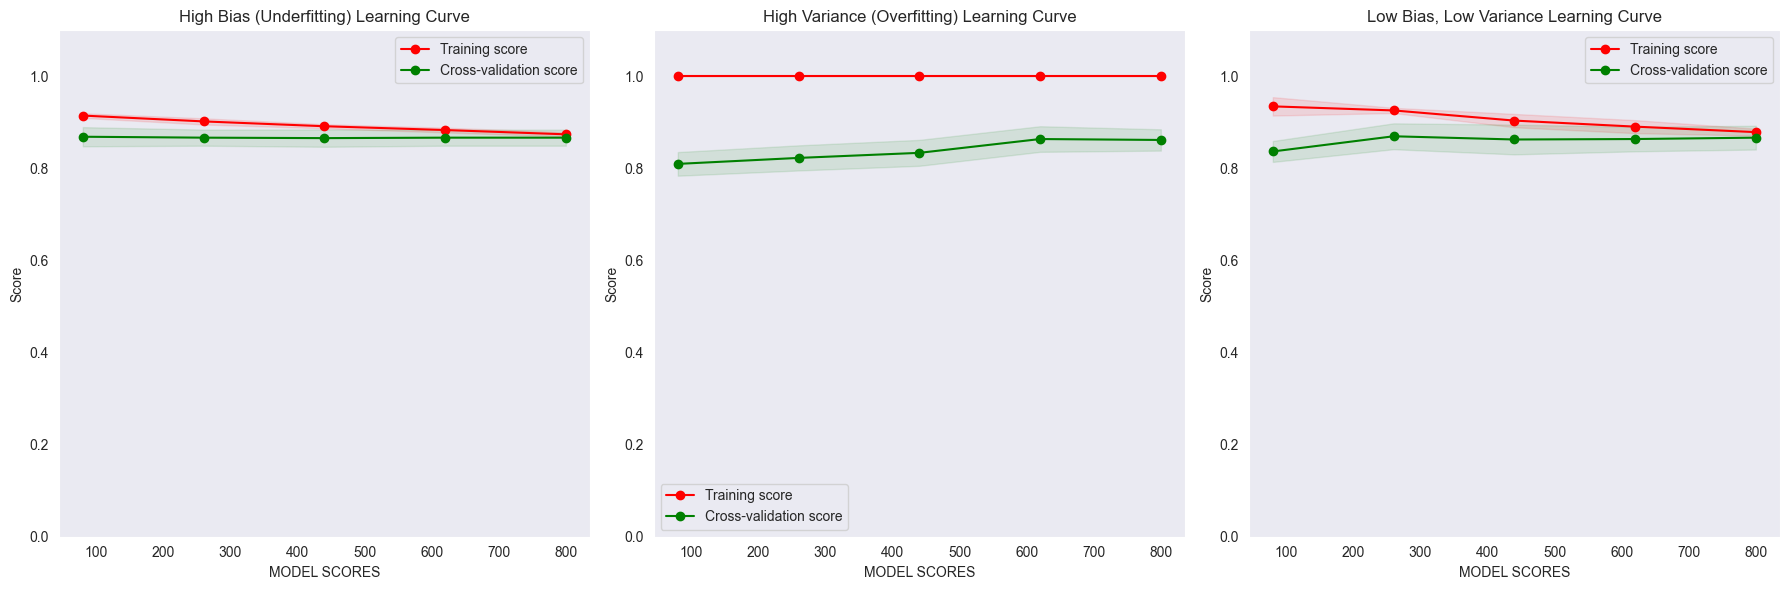

In [9]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

def plot_learning_curve(ax, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("MODEL SCORES")
    ax.set_ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(accuracy_score))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax.grid()
    
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    ax.legend(loc="best")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

estimator_high_bias = DecisionTreeClassifier(max_depth=1, random_state=42)
estimator_high_variance = DecisionTreeClassifier(max_depth=None, random_state=42)
estimator_low_bias_variance = LogisticRegression(random_state=42)


title = "High Bias (Underfitting) Learning Curve"
plot_learning_curve(axes[0], estimator_high_bias, title, X, y, ylim=(0, 1.1), cv=5, n_jobs=-1)

title = "High Variance (Overfitting) Learning Curve"
plot_learning_curve(axes[1], estimator_high_variance, title, X, y, ylim=(0, 1.1), cv=5, n_jobs=-1)

title = "Low Bias, Low Variance Learning Curve"
plot_learning_curve(axes[2], estimator_low_bias_variance, title, X, y, ylim=(0, 1.1), cv=5, n_jobs=-1)

plt.tight_layout()
plt.show()

IMAGE GENERATION OF THE 4 CLASSES

Found 5712 images belonging to 4 classes.


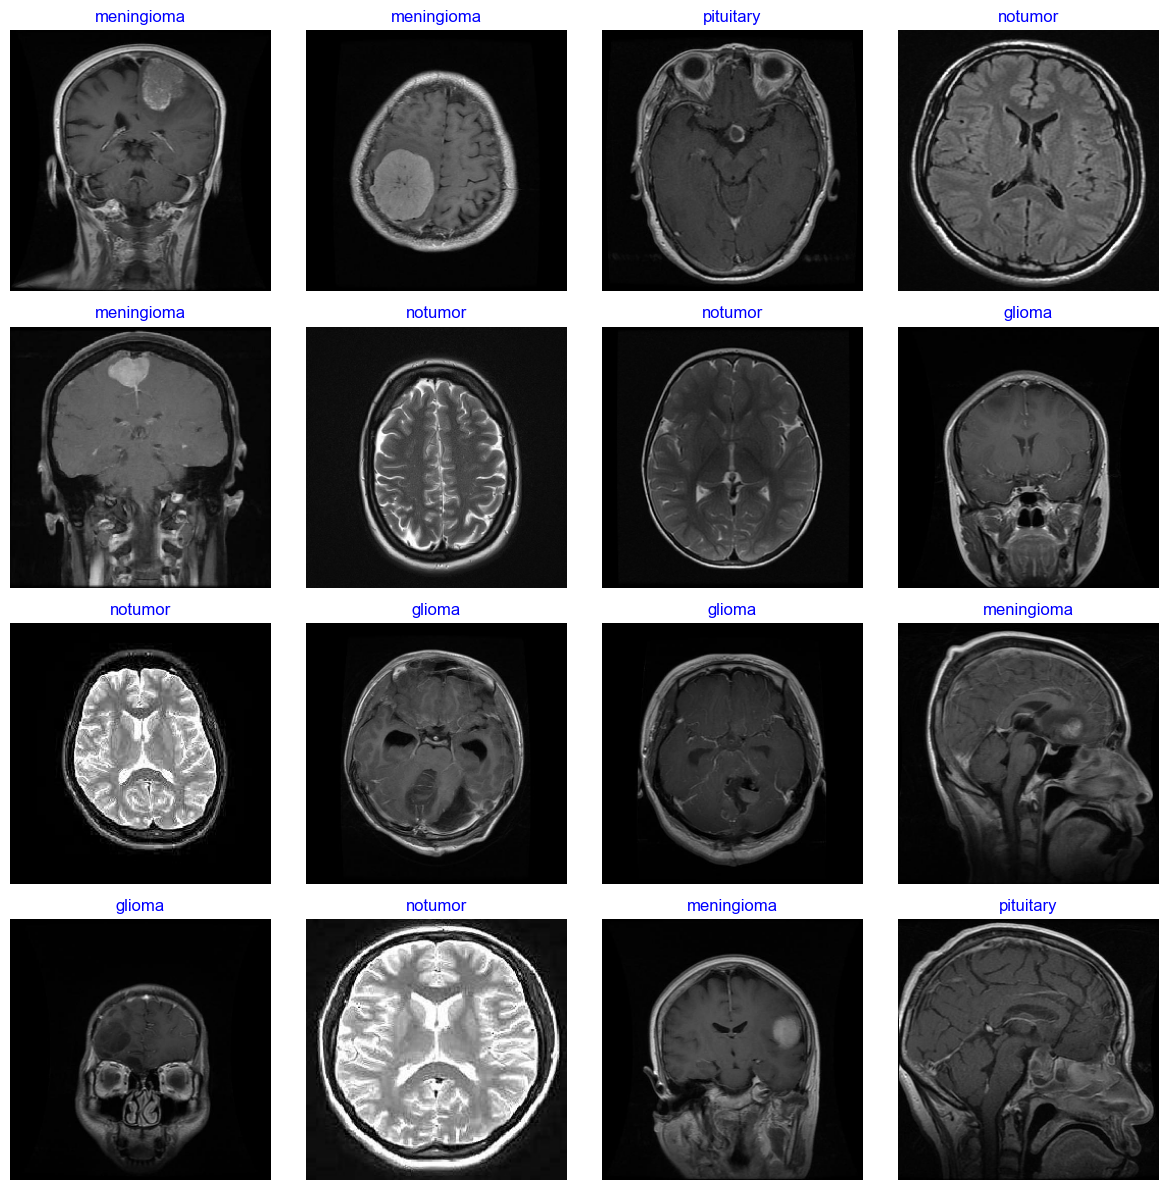

In [34]:
batch_size = 16
img_size = (256, 256)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

train_data_dir = 'Training'
test_data_dir = 'Testing'

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

images, labels = next(train_gen)

g_dict = train_gen.class_indices
classes = list(g_dict.keys())

num_images_to_display = 16

plt.figure(figsize=(12, 12))

for i in range(num_images_to_display):
    plt.subplot(4, 4, i + 1)
    image = images[i]
    plt.imshow(image.astype(int))
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='blue', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

CLASSIFICATION OF THE IMAGES BY USER INPUT

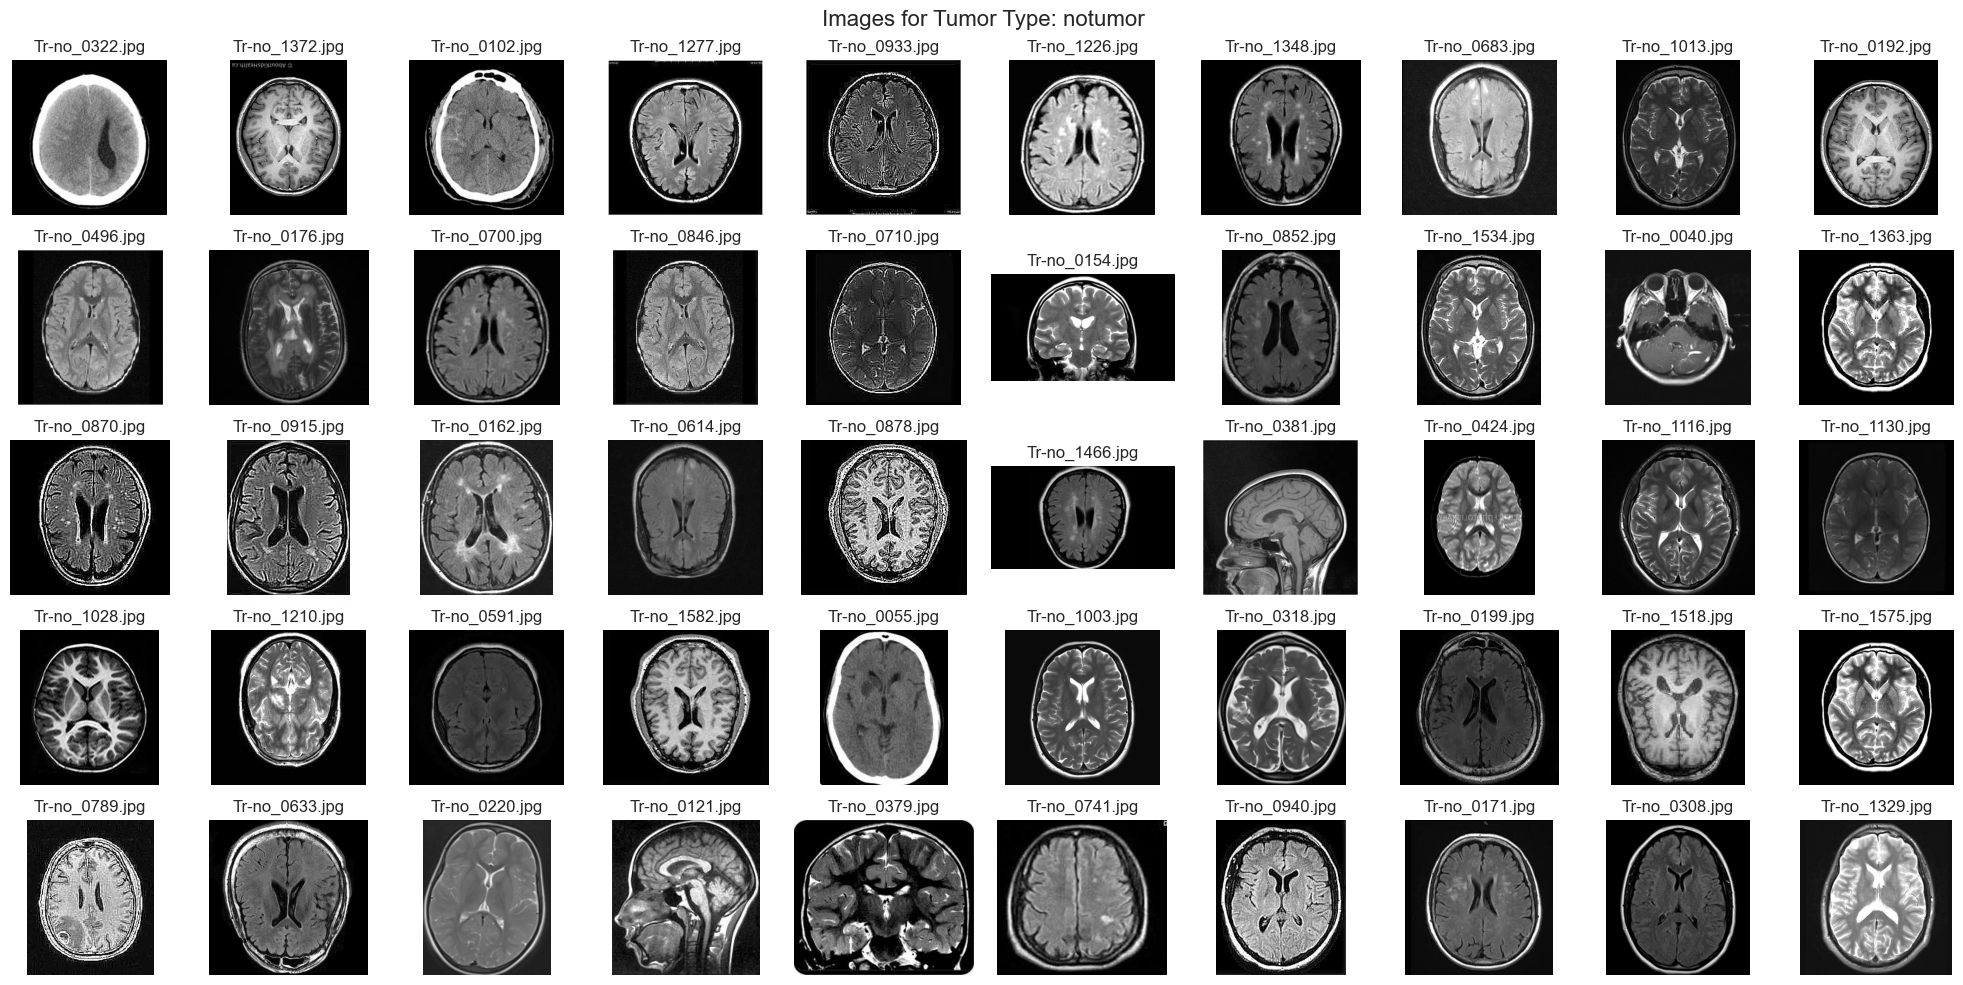

In [11]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def show_images_by_class(class_name, num_images=50):
    class_dir = os.path.join(train_data_dir, class_name)
    class_images = os.listdir(class_dir)
    
    if len(class_images) == 0:
        print(f"No images found for class: {class_name}")
        return
    
    random.shuffle(class_images)
    
    num_rows = 5
    num_cols = 10
    
    plt.figure(figsize=(20, 10))
    plt.suptitle(f"Images for Tumor Type: {class_name}", fontsize=16)
    
    for i in range(min(num_images, len(class_images))):
        image_name = class_images[i]
        image_path = os.path.join(class_dir, image_name)
        img = Image.open(image_path).convert("RGB")
        
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img)
        plt.title(image_name, fontsize=12)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

user_input = input("Enter the name of the image class: ")
show_images_by_class(user_input, num_images=50)

PREDICTION OF THE TUMOR TYPE BY GIVING IMAGES

1/1 [==============================] - 1s 1s/step


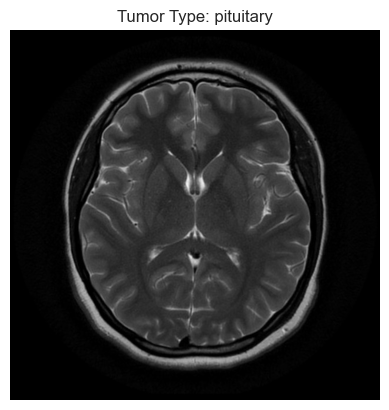

1/1 [==============================] - 0s 46ms/step


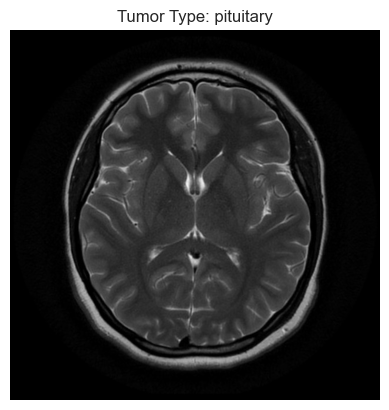

1/1 [==============================] - 0s 43ms/step


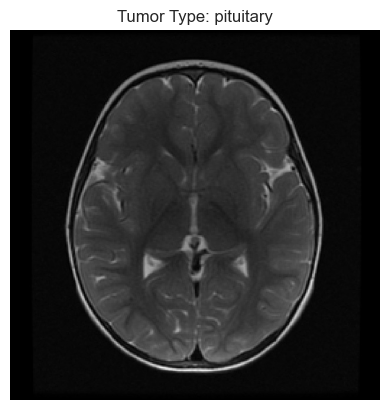

In [12]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

loaded_model = load_model('brain_tumor_model.h5')

classes = ['glioma','meningioma','notumor','pituitary']

input_folder = 'Images'

for filename in os.listdir(input_folder):
    if filename.endswith('.jpg'):
        img_path = os.path.join(input_folder, filename)

        img = image.load_img(img_path, target_size=(150, 150))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = img / 255.0

        prediction = loaded_model.predict(img)
        class_index = np.argmax(prediction)
        class_label = classes[class_index]
        img = image.load_img(img_path)
        plt.figure()
        plt.imshow(img)
        plt.title(f"Tumor Type: {class_label}")
        plt.axis('off')
        plt.show()